**Environment and Data**

In [1]:
import pickle
import pandas as pd

from surprise import NMF, SVD
from surprise import Reader, Dataset, evaluate
from surprise.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [29]:
# Load and preprocess data
with open('data/graph_info_bin.pkl') as f:
    graph = pickle.load(f)
    
num_users, num_items, u_nodes, v_nodes, ratings = graph

# Create dataframe
df = pd.DataFrame({'uid': u_nodes,
                  'vid': v_nodes,
                  'ratings': ratings})

# Transform IDs to starting from 1
df['uid'] = df['uid'].apply(lambda x: x + 1)
df['vid'] = df['vid'].apply(lambda x: x + 1)

# Load dataset into readable format
reader = Reader(rating_scale=(1, 2))
data = Dataset.load_from_df(df[['uid', 'vid', 'ratings']], reader)

# Split into train and test sets
train, test = train_test_split(data, test_size=.2, shuffle=True)

**First runs**

In [13]:
nmf = NMF()
evaluate(nmf, data, measures=['RMSE'])

Evaluating RMSE of algorithm NMF.

------------
Fold 1
RMSE: 0.4396
------------
Fold 2
RMSE: 0.4936
------------
Fold 3
RMSE: 0.4990
------------
Fold 4
RMSE: 0.4718
------------
Fold 5
RMSE: 0.4562
------------
------------
Mean RMSE: 0.4720
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'rmse': [0.4395893663547196,
                             0.4935613810144348,
                             0.49896207197749554,
                             0.47175418083408943,
                             0.4562003647632732]})

In [12]:
svd = SVD()
evaluate(svd, data, measures=['RMSE'])

Evaluating RMSE of algorithm SVD.

------------
Fold 1
RMSE: 0.4638
------------
Fold 2
RMSE: 0.4273
------------
Fold 3
RMSE: 0.4884
------------
Fold 4
RMSE: 0.4572
------------
Fold 5
RMSE: 0.4680
------------
------------
Mean RMSE: 0.4609
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'rmse': [0.46384466483847964,
                             0.4272503285406667,
                             0.48843894905895935,
                             0.4571721451750262,
                             0.4679857239392926]})

**Choosing Paramters**

In [18]:
def fit_and_predict(model, trainset, testset):
    model.fit(trainset)
    
    labels = []
    for _, _, rating in testset:
        labels.append(rating)
    
    pred = model.test(testset)
    
    estimated = []
    for p in pred:
        estimated.append(p.est)
    
    return labels, estimated

In [20]:
def accuracy(labels, est, thres=1.5):
    pred = []
    for i in range(len(est)):
        if est[i] > thres:
            pred.append(2.0)
        else:
            pred.append(1.0)
    
    return accuracy_score(labels, pred)

In [89]:
labels, est = fit_and_predict(svd, train, test)

In [90]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
ts = np.arange(1., 2., 0.05)
accs, logs = [], []
for t in ts:
    acc = accuracy(labels, est, thres=t)
    accs.append(acc)
    logs.append(np.log(t))

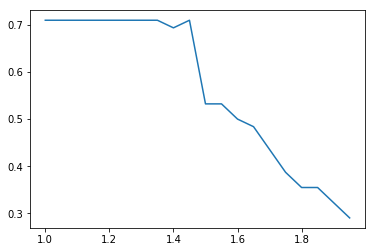

In [83]:
plt.plot(ts, accs)

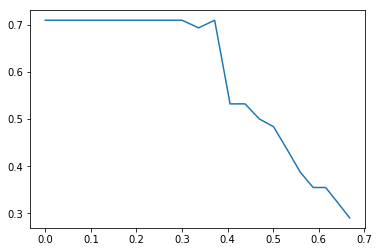

In [84]:
plt.plot(logs, accs)

In [88]:
# Split into train and test sets
train, test = train_test_split(data, test_size=.2, shuffle=True)
nmf = NMF()

In [91]:
accuracy(labels, est, thres=1.2)

0.6129032258064516